In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import chdir
import cv2  # python-opencv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from PIL import Image, ImageEnhance
from sklearn.metrics import jaccard_score
from scipy import stats

# Data paths
data_path = '/path/to/data'
test = data_path + '/test'
train = data_path + '/train'
val = data_path + '/validation'
os.chdir(data_path)

# Function that removes lines
def remove_lines(img):
  img = cv2.imread(img, 0)
  m2 = np.mean(img, axis=1)
  fft = np.fft.fft( m2 )

  xs = list(range(0, 1000))
  ys = ( fft[62] * np.exp( [1j * 2*np.pi / 1000 * 62 * x for x in xs] ) + fft[63] * np.exp( [1j * 2*np.pi / 1000 * 63 * x for x in xs]) )

  minima = [i for i in range(len(ys)) if (i == 0 or ys[i-1] > ys[i]) and (i == len(ys)-1 or ys[i+1] >= ys[i])]
  new_minima = [i for i in minima]

  for i in minima:
      d1 = 1e6
      d2 = 1e6
      if i != 0:
          d1 = ys[i-1] - ys[i]
      if i != len(ys)-1:
          d2 = ys[i+1] - ys[i]
      if d1 < d2:
          new_minima.append(i-1)
      else:
          new_minima.append(i+1)
          
  for row in new_minima:
      L = row - 3
      if L in new_minima:
          L -= 2
      U = row + 3
      if U in new_minima:
          U += 2
      if L < 0:
          pass
      elif U >= len(img):
          pass
      else:
          img[row] = (img[L] / 2 + img[U] / 2)

  return img

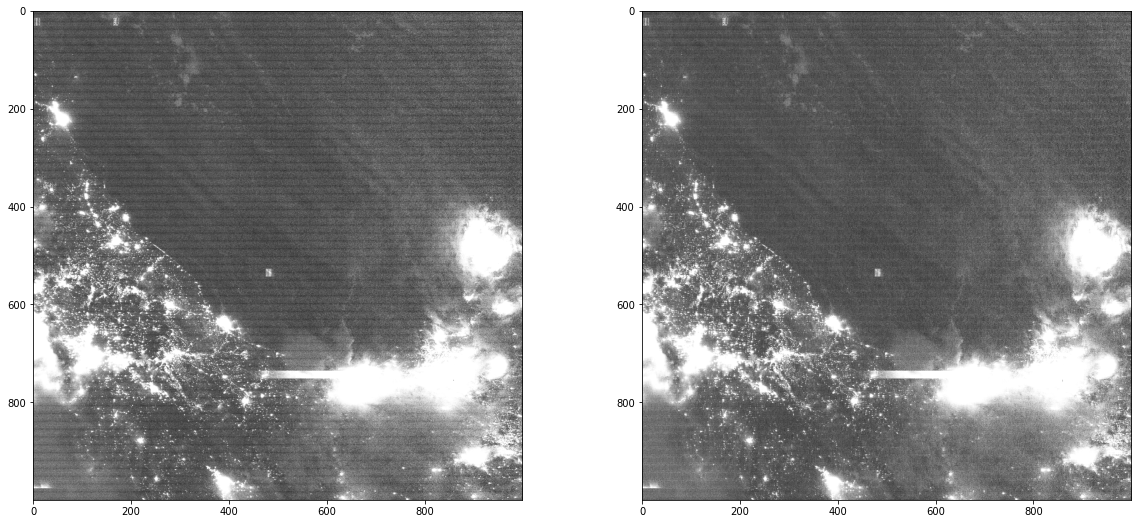

In [ ]:
# Displays the images side by side
img_name = '/imagepath1/sample20.png'
img = cv2.imread('/imagepath2.sample_20.png',0)

matplotlib.rcParams['figure.figsize'] = (20, 9)
  
plt.title("Histogramm for given Image")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")

plt.subplot(1,2,2)
image_new = remove_lines(img_name)
plt.imshow(image_new,cmap="gray")

In [ ]:
# Saves the images with removed lines for specified folders

path = test + '/withoutgw'
dir = os.listdir(path)
n = len(dir)
save_path = '/path/to/dir'

for i in range(29):
  x = path + '/' + dir[i]
  y = remove_lines(x)
  z = save_path + '/' + dir[i]
  save = cv2.imwrite(z, y)
  if save:
	  print(z + ' is successfully saved as file.')